# Visualizing FITS Astronomy Data | Astronomy Research Data Analysis

## FIts file
This format is mostly used on Astronomy and following the description by [Wikipedia](https://en.wikipedia.org/wiki/FITS), FITS are: 
> Image metadata is stored in a human-readable ASCII header. The information in this header is designed to calculate the byte offset of some information in the subsequent data unit to support direct access to the data cells. Each FITS file consists of one or more headers containing ASCII card images

The structure of FITS it can be visualized on the figure below.

![Fits_structure](https://graffica.info/wp-content/uploads/2016/05/ch2_stis_data4.2.jpg)

## Getting M31 FITS data
This data corresponds to M31 or Andromeda galaxy. We can get the data from 
[Skyview](https://skyview.gsfc.nasa.gov/current/cgi/query.pl) and directly to python using Astroquery

In [1]:
import matplotlib.pyplot as plt
from astroquery.skyview import SkyView

In [2]:
# Get the data from andromeda galaxy (M31) from SDSSg survey
SkyView.get_images('M31', 'SDSSg')

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f6e887b56d0>]]

In [3]:
hdu = SkyView.get_images('M31', 'SDSSg')[0][0]

In [4]:
# Check metadata 
hdu.header

SIMPLE  =                    T / Written by SkyView Mon Mar 04 11:56:21 EST 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [5]:
# And pixel information 
hdu.data

array([[5.4453125, 5.453125 , 5.4453125, ..., 7.4609375, 7.515625 ,
        7.4140625],
       [5.4375   , 5.453125 , 5.421875 , ..., 7.625    , 7.4453125,
        7.4453125],
       [5.4765625, 5.359375 , 5.4609375, ..., 7.4375   , 7.5625   ,
        7.46875  ],
       ...,
       [7.3984375, 7.3984375, 7.546875 , ..., 5.53125  , 5.671875 ,
        5.7578125],
       [7.46875  , 7.6171875, 7.5859375, ..., 5.6640625, 5.671875 ,
        5.5625   ],
       [7.53125  , 7.5078125, 7.5859375, ..., 5.53125  , 5.59375  ,
        5.5546875]], dtype='>f4')

In [6]:
# Check the dimension
M31_Pixels = hdu.data
hdu.data.shape

(300, 300)

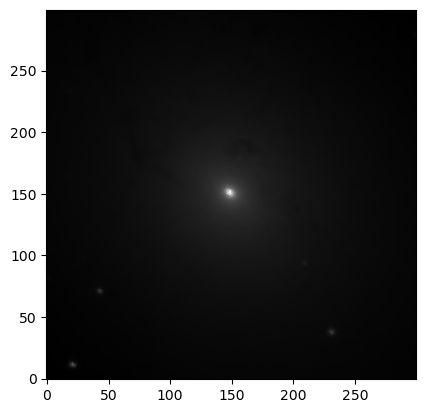

In [7]:
# Now, we plot the data
plt.imshow(M31_Pixels, cmap='grey', origin='lower')

Now, we repeat to with other survey and different scaling

In [8]:
import astropy.units as u

In [9]:
hdu = SkyView.get_images('M31', 'DSS2 Blue',
                         pixels=600, # Picture size on pixels
                         radius=150*u.arcmin)[0][0] # Zoom of picture (in arcminutes)

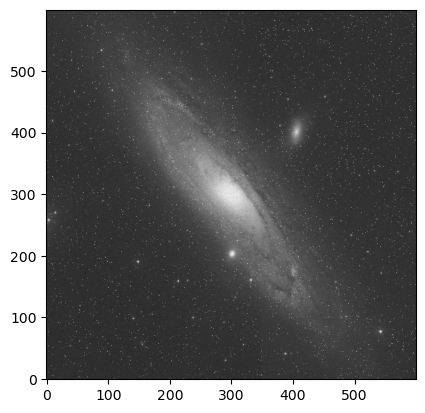

In [10]:
plt.imshow(hdu.data, cmap='grey', origin='lower')

## Pixel scaling on M31 Data

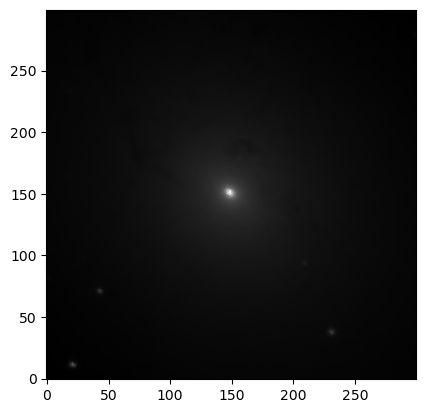

In [11]:
# Checking again the M31 pixel data
plt.imshow(M31_Pixels, cmap='grey', origin='lower')

In [12]:
# We perform some statistic
import numpy as np
print('Statistics summary of M31 pixels')
print(f'Minimum value: {M31_Pixels.min()}')
print(f'Maximum value: {M31_Pixels.max()}')
print(f'Average value: {M31_Pixels.mean()}')
print(f'Std: {M31_Pixels.std()}')

Statistics summary of M31 pixels
Minimum value: 5.359375
Maximum value: 178.0
Average value: 13.329444885253906
Std: 6.3922271728515625


Because the mean value is very near to the minimum value, it's possible to have noice the pixels data.To check it, let's create a histogram of the pixels

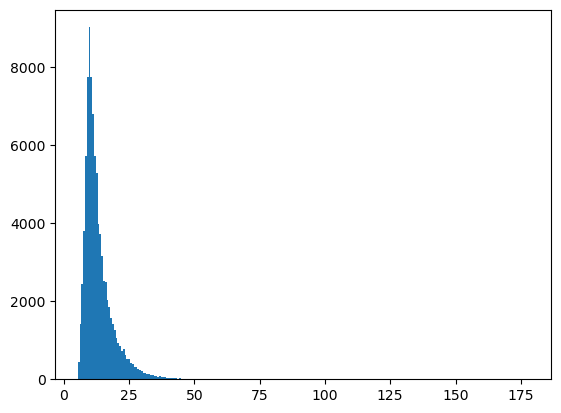

In [13]:
# Do a simple histogram of the pixels
plt.hist(M31_Pixels.flatten(), bins=250)
plt.show()

## Scaling data
### Intensity Normalization or Linear scaling or Min Max scaling
$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}$

In [14]:
# Defining a function to compare the plots
def plot_pixels(pixel_array, title, color):
    plt.imshow(pixel_array, cmap='grey', origin='lower')
    plt.title(title, color=color, weight='bold')
    plt.axis('off')
    plt.show()

def compare_pixels(original_array, scaled_array, title, color):
    plt.subplot(1, 2, 1)
    plot_pixels(original_array, title='Original Image', color='black')
    plt.subplot(1, 2, 2)
    plot_pixels(scaled_array, title=title, color=color)
    plt.tight_layout()
    plt.show()

In [15]:
# Defining the function to normalize
def minmax_scaling(pixel_array):
    num = pixel_array - np.min(pixel_array)
    den = np.max(pixel_array) - np.min(pixel_array)
    return num / den

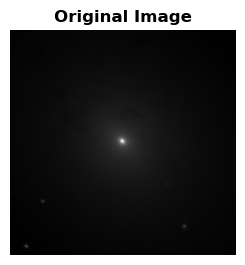

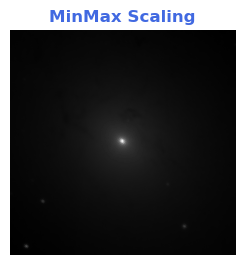

<Figure size 640x480 with 0 Axes>

In [16]:
minmax_arr = minmax_scaling(M31_Pixels)
compare_pixels(M31_Pixels, minmax_arr, title='MinMax Scaling', color='royalblue')

### Standard Scaling 
$$z = \frac{x - \mu}{\sigma}$$

In [17]:
# Function to standarize
def z_scale(pixel_array):
    num = pixel_array - np.mean(pixel_array)
    den = np.std(pixel_array)
    return num / den

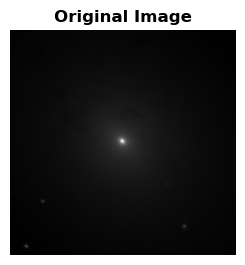

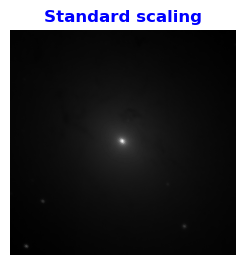

<Figure size 640x480 with 0 Axes>

In [18]:
scaled_array = z_scale(M31_Pixels)
compare_pixels(M31_Pixels, scaled_array, 'Standard scaling', 'blue')

### Log nomalization 

In [19]:
# Defining the function
def log_norm(pixel_array):
    return np.log(pixel_array)

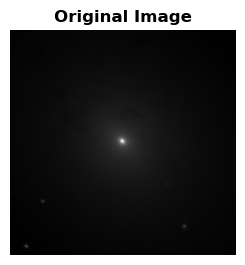

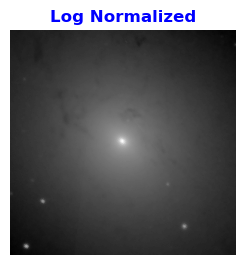

<Figure size 640x480 with 0 Axes>

In [20]:
# Visualize the change 
pixel_log = log_norm(M31_Pixels)
compare_pixels(M31_Pixels, pixel_log, 'Log Normalized', 'blue')

### Create histogram of pixel for the best output

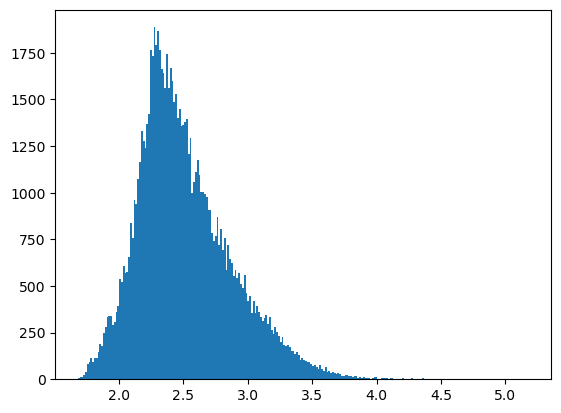

In [21]:
# Proceed to check the normalized array 
plt.hist(pixel_log.flat, bins=250)
plt.show()

### Square root normalization

In [22]:
# Create the function
def sqrt_scale(pixel_array):
    return np.sqrt(pixel_array)

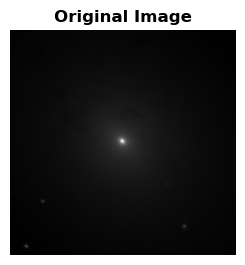

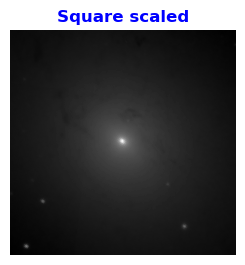

<Figure size 640x480 with 0 Axes>

In [23]:
sqrt_array = sqrt_scale(M31_Pixels)
compare_pixels(M31_Pixels, sqrt_array, 'Square scaled', 'blue')

### ZScaleInterval

In [24]:
# Import from astropy 
from astropy.visualization import ZScaleInterval

In [25]:
# Create the ZScale object
z = ZScaleInterval()

In [26]:
# Get the maximun and minimun values for the scale in the array 
z1, z2 = z.get_limits(pixel_log)

In [27]:
print(f'Maximum value: {z2}')
print(f'Minimum value: {z1}')
print(f'Curretn maximum value: {pixel_log.max()}')
print(f'Current minimum value: {pixel_log.min()}')

Maximum value: 4.447910199027213
Minimum value: 1.6889997720718384
Curretn maximum value: 5.181783676147461
Current minimum value: 1.678847312927246


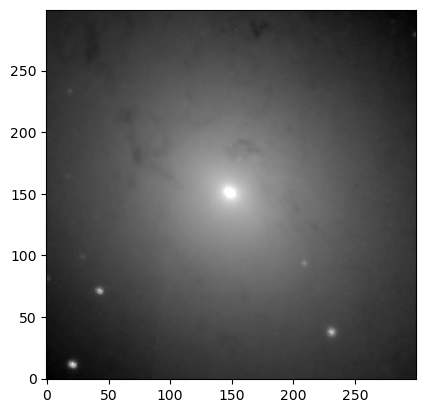

In [28]:
# Plot the M31 pixels with this interval
im = plt.imshow(pixel_log, vmin=z1, vmax=z2, cmap='grey',
           origin='lower')
plt.show()

In [29]:
# Get the array from the image above
image = im.make_image(renderer=None, unsampled=True)[0]

In [30]:
# Check the shape - channels of the image
image.shape

(300, 300, 4)

**Note**
* The channels are Red, Green, Blue, and Alpha

### Change 4 channels to grayscale

In [31]:
import cv2

In [32]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # We must specify the order of the channels

In [33]:
# Check the channels
gray.shape

(300, 300)

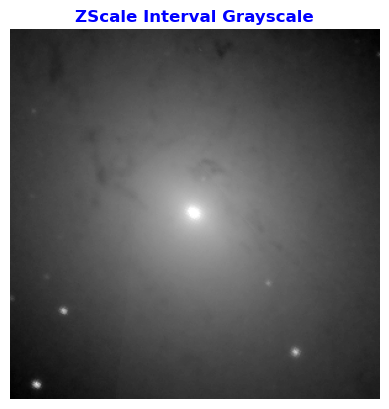

In [34]:
# Visualize 
plot_pixels(gray, 'ZScale Interval Grayscale', color='blue')

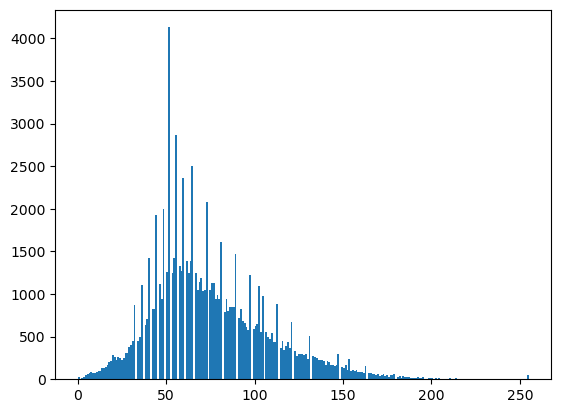

In [35]:
# Review the histogram 
plt.hist(gray.flat, bins=250);

## Denoising using Gaussian
It removes noise by performing the [Gaussian Smoothing](https://en.wikipedia.org/wiki/Gaussian_blur)

In [36]:
# Import from scipy's signal module the convolutional filter 
from scipy.signal import convolve2d

In [37]:
# Generate kernel filter 
## Divide by 9 make the max number output be 1
kernel = np.ones((3, 3)) / 9
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [38]:
# Create gaussian kernel 
gaussian_kernel = np.array([[1/16, 1/8, 1/16],
                            [1/8, 1/4, 1/8],
                            [1/16, 1/8, 1/16]])

In [39]:
# Get the convolution for the normal kernel
conv_norm = convolve2d(M31_Pixels, kernel, mode='same') # mode same to keep shape

In [40]:
# Get the convolution for the gaussian kernel
conv_gauss = convolve2d(M31_Pixels, gaussian_kernel, mode='same') 

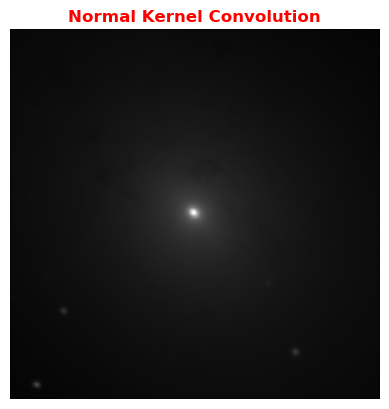

In [41]:
# Visualize the first 
plot_pixels(conv_norm, 'Normal Kernel Convolution', 'red')

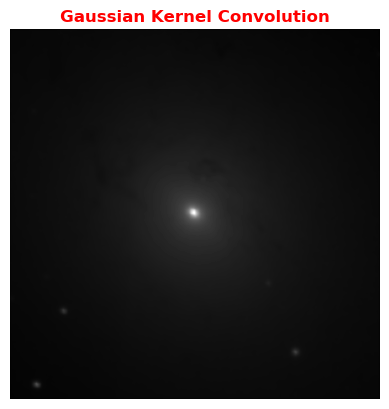

In [42]:
# Visualize the second 
plot_pixels(conv_gauss, 'Gaussian Kernel Convolution', 'red')

In [43]:
# Repeat with the grayscaled data with gaussian kernel 
conv_gray = convolve2d(gray, gaussian_kernel, mode='same')

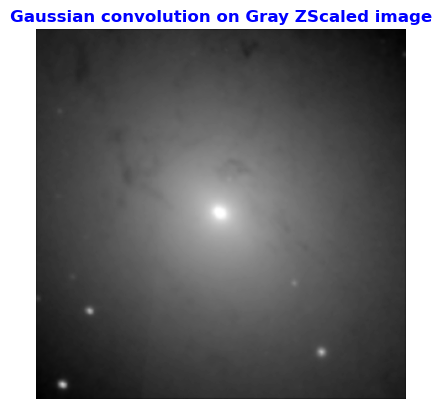

In [44]:
# Check how it looks
plot_pixels(conv_gray, 'Gaussian convolution on Gray ZScaled image', 'blue')

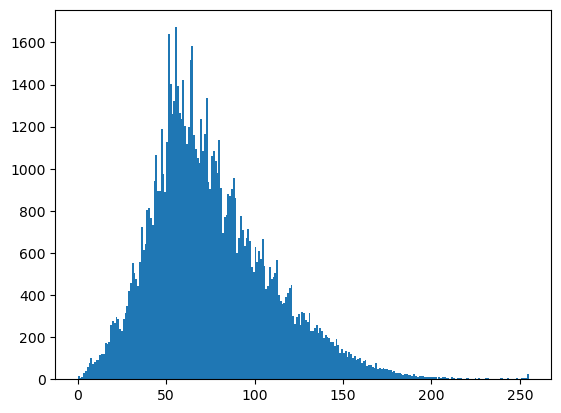

In [45]:
# Get the histogram 
plt.hist(conv_gray.flat, bins=250);

## Enhancing Linear Features on M31 

In [46]:
# Create the spectral list 
SPECTRAL_LIST = ['gray', 'jet', 'hot', 'prism', 'nipy_spectral']

In [47]:
# Import the filters from skimage
from skimage.filters import meijering, sato

In [48]:
# Apply de filters in data
meijering_output = meijering(conv_gray)
sato_output = sato(conv_gray)

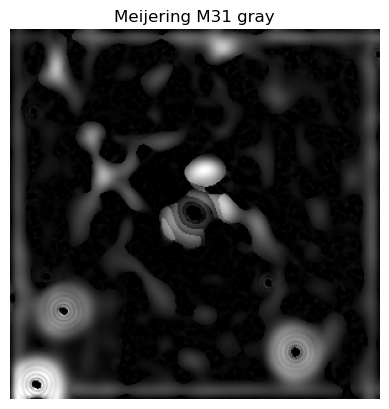

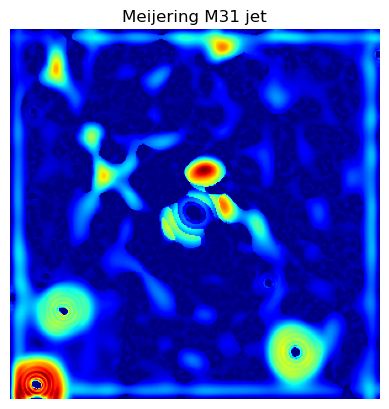

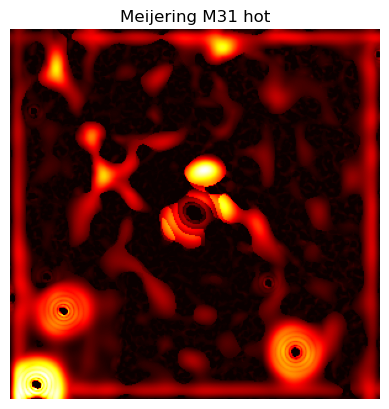

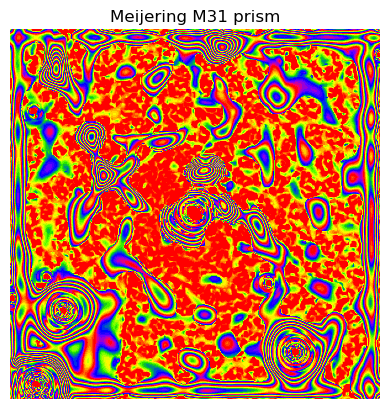

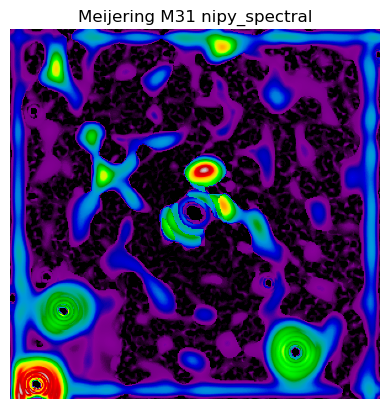

In [49]:
# For each element in spectral list, show the mejering filter 
for cmap in SPECTRAL_LIST:
    plt.imshow(meijering_output, cmap=cmap, origin='lower')
    plt.title(f'Meijering M31 {cmap}')
    plt.axis('off')
    plt.show()

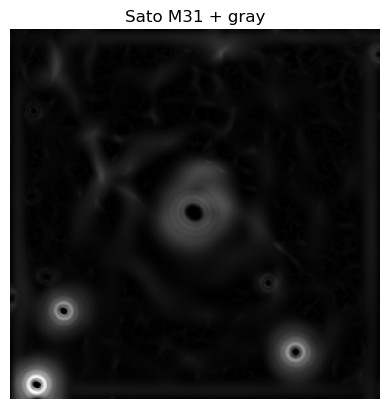

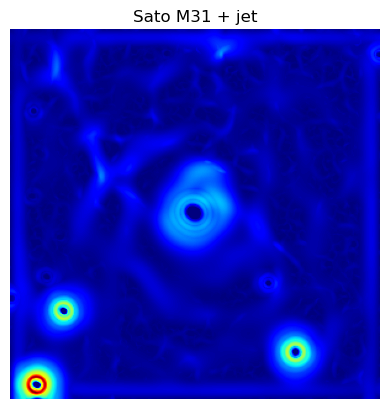

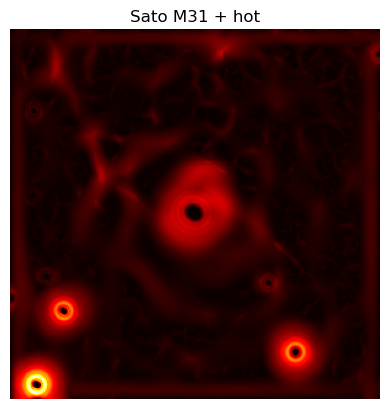

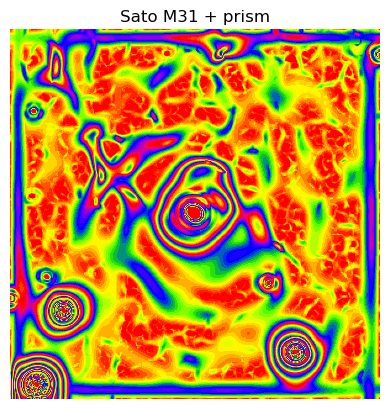

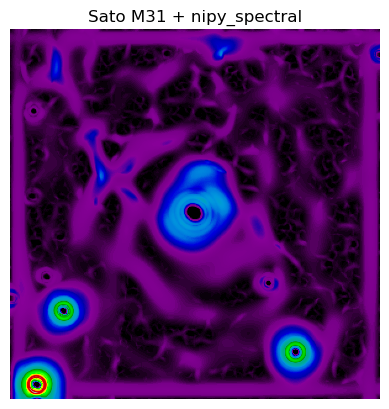

In [50]:
# Repeat with sato filter 
for cmap in SPECTRAL_LIST:
    plt.imshow(sato_output, cmap=cmap, origin='lower')
    plt.title(f'Sato M31 + {cmap}')
    plt.axis('off')
    plt.show()

## Feature Detection and Extraction
Skimage Features used for features detection and extraction, e.g., texture analysis corners, etc.

The features are: https://scikit-image.org/docs/stable/api/skimage.feature.html

### Corner Foerstner
A fast operator for detection and precise location of distinct points, corners and centres of circular features

In [51]:
# Import
from skimage.feature import corner_foerstner

In [54]:
# Apply on the dataset of interest, it could be any of the seem until now 
feature_output = corner_foerstner(conv_gray)

In [58]:
# Check the feature_output
feature_output[0]

array([[9.79544528e-02, 2.57705338e-01, 9.58506130e-01, ...,
        3.62193774e+02, 9.76426560e+02, 8.83608946e+02],
       [2.37826749e-01, 6.26869332e-01, 1.24089914e+00, ...,
        5.73550193e+02, 1.26119970e+03, 9.75999576e+02],
       [3.84897253e-01, 9.46547881e-01, 1.34298345e+00, ...,
        4.37268759e+02, 5.76844274e+02, 3.63137024e+02],
       ...,
       [3.45147146e+02, 5.81465314e+02, 4.74444964e+02, ...,
        7.81726108e+00, 1.09346723e+01, 6.62010682e+00],
       [9.83490756e+02, 1.30543616e+03, 6.16725561e+02, ...,
        8.67505368e+00, 1.45111168e+01, 1.11028258e+01],
       [9.11875051e+02, 1.01954417e+03, 3.83841295e+02, ...,
        5.04433793e+00, 9.76391386e+00, 8.90015495e+00]])

In [59]:
# Data type of feature
type(feature_output) 

tuple

In [60]:
# Size of feature 
len(feature_output)

2

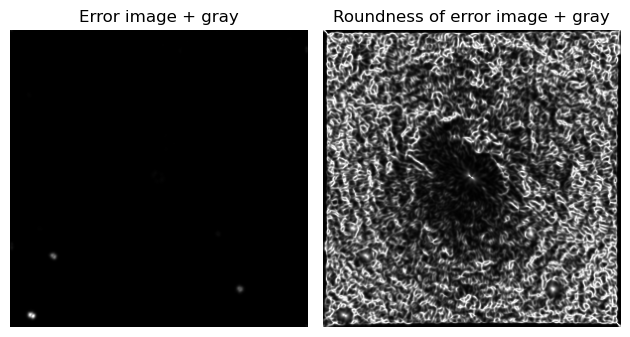

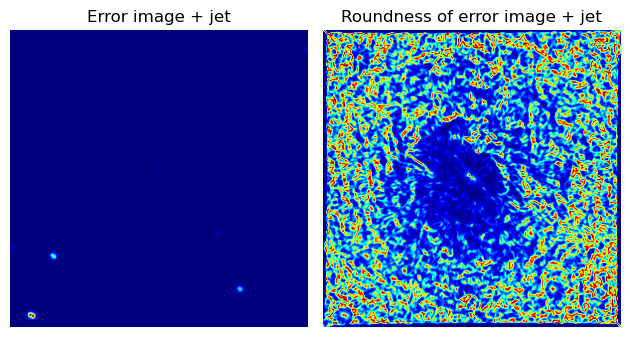

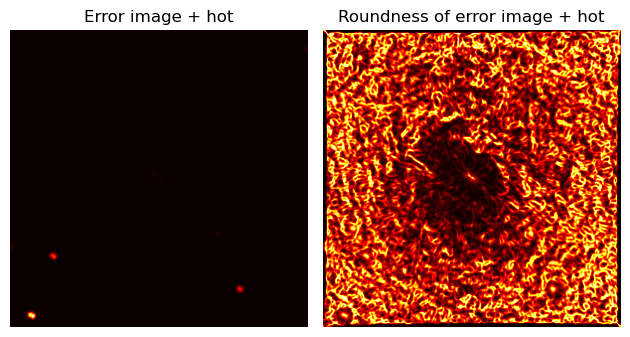

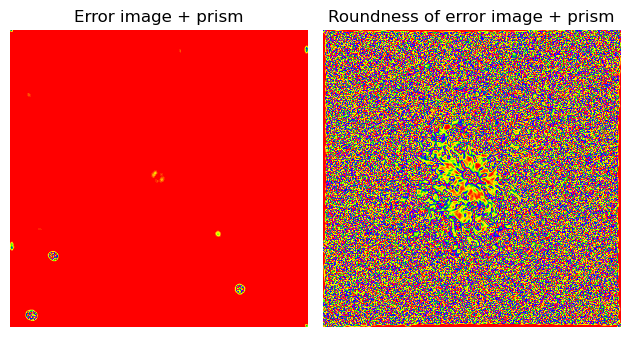

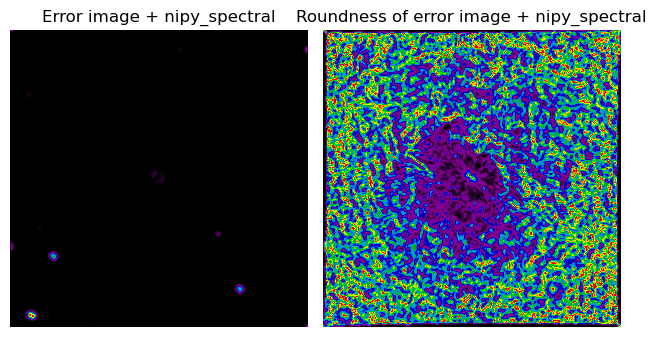

In [62]:
for cmap in SPECTRAL_LIST:
    plt.subplot(1, 2, 1)
    plt.imshow(feature_output[0], cmap=cmap, origin='lower')
    plt.title(f'Error image + {cmap}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(feature_output[1], cmap=cmap, origin='lower')
    plt.title(f'Roundness of error image + {cmap}')
    plt.axis('off')

    plt.tight_layout()
    plt.show() 

### Multiscale_basic_features (Local Features)

In [64]:
# Import the library 
from skimage.feature import multiscale_basic_features

In [65]:
# Create feature image
feature_image = multiscale_basic_features(conv_gray)

In [66]:
# Check data type 
type(feature_image)

numpy.ndarray

In [67]:
# Now the shape 
feature_image.shape

(300, 300, 24)

In [68]:
# Storing ech feature and every channel
## Using cv2 to split channels
len(cv2.split(feature_image))

24

In [69]:
P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24 = cv2.split(feature_image)

In [71]:
# Check P1
P1.shape

(300, 300)

In [72]:
# And the last one 
P24.shape

(300, 300)

In [73]:
# Create list of pixels for each channel 
pixels = [P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24]

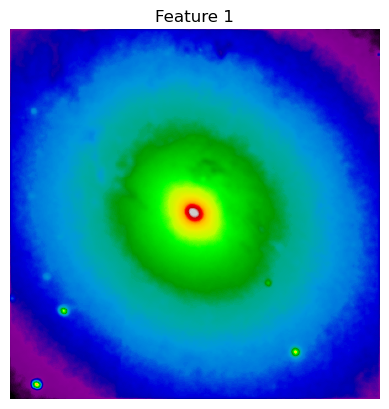

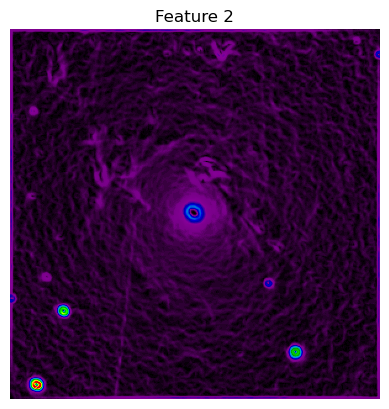

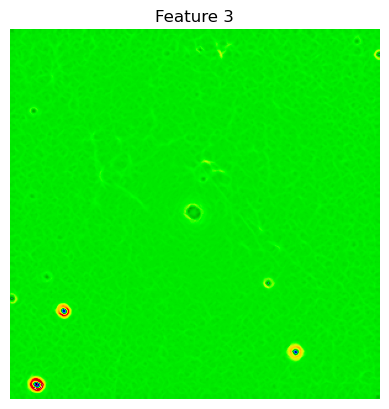

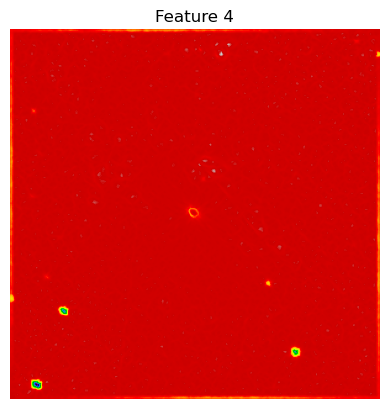

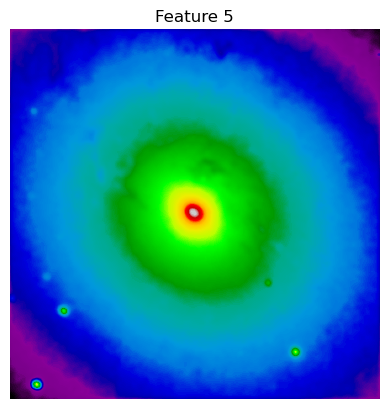

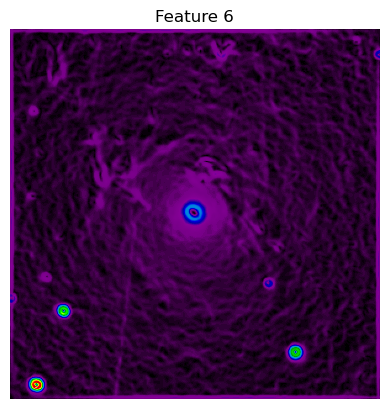

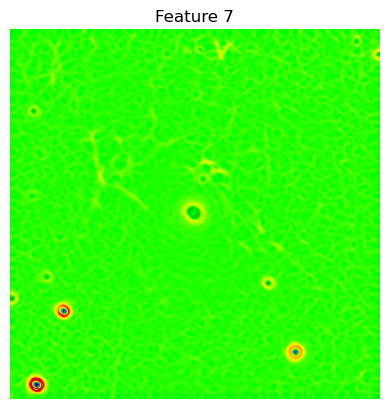

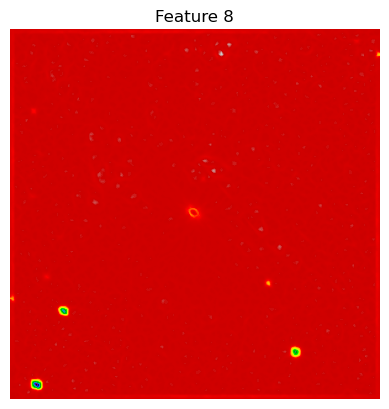

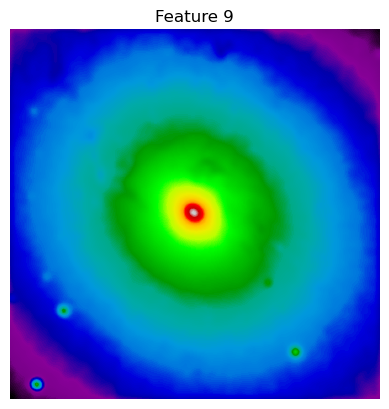

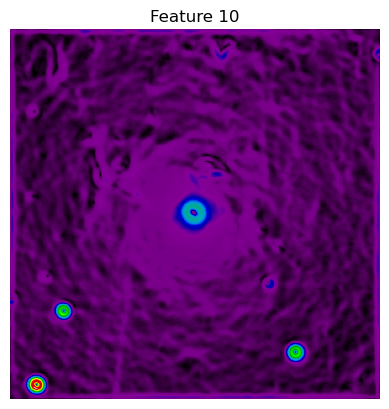

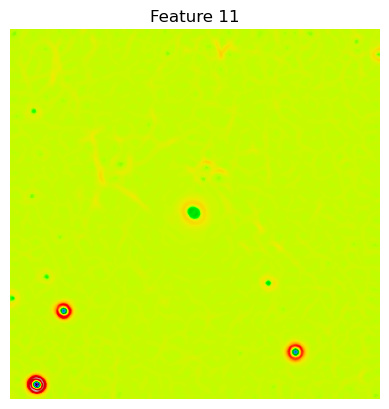

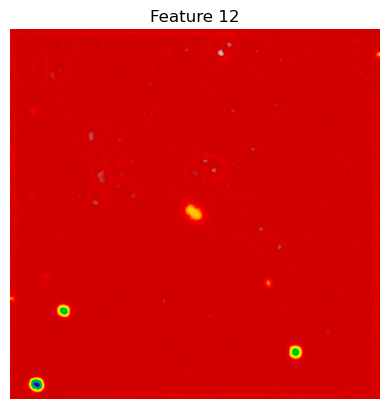

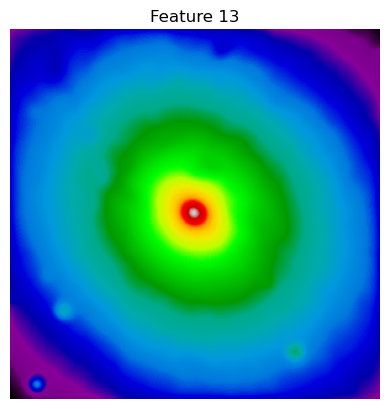

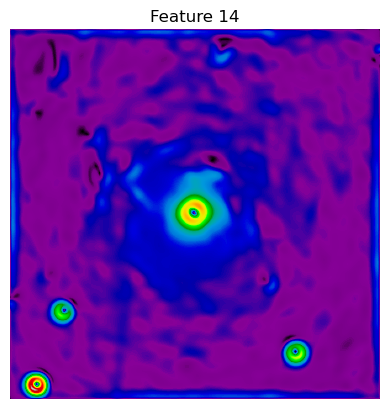

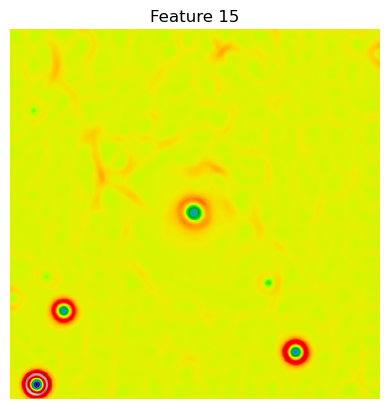

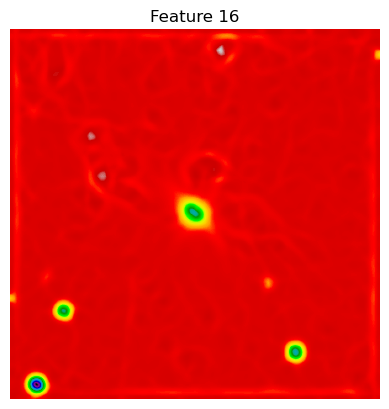

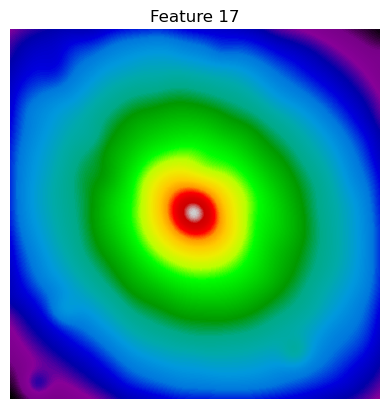

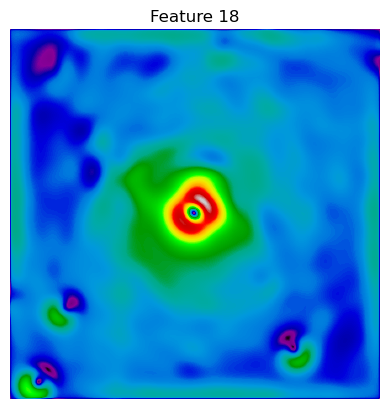

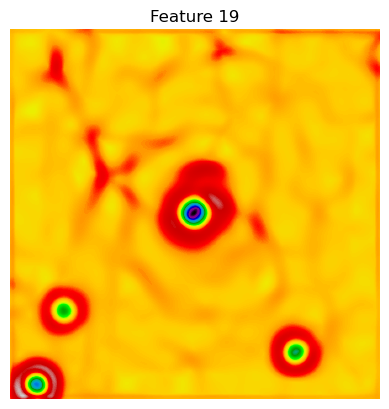

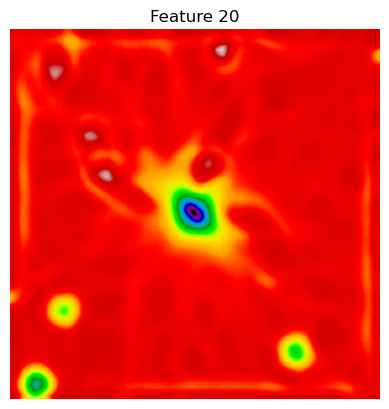

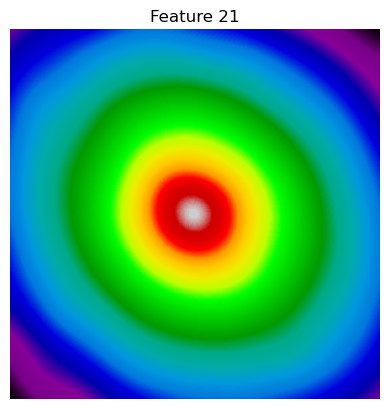

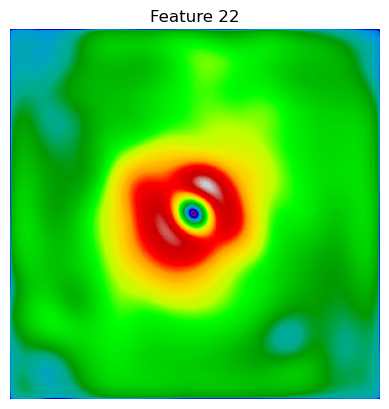

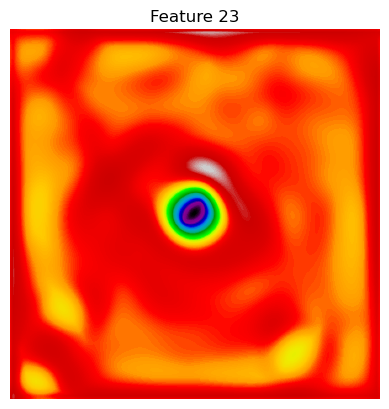

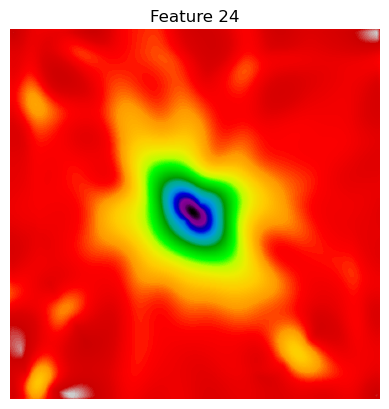

In [74]:
# Visualize each channel using a spectral 
for num, feature in enumerate(pixels):
    plt.imshow(feature, cmap='nipy_spectral', origin='lower')
    plt.title(f'Feature {num + 1}')
    plt.axis('off')
    plt.show()